In [1]:
# packages?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.utils import resample
from sklearn.decomposition import PCA
import seaborn as sns
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier 



EXPLORATORY DATA ANALYSIS

Dataset shape: 3520 rows, 2002 columns

Preview of dataset:
   Gene 1  Gene 2  Gene 3   Gene 4  Gene 5  Gene 6  Gene 7  Gene 8  Gene 9  \
0     NaN   133.0    75.0  12971.0   401.0   296.0   348.0  1087.0  4224.0   
1     5.0   127.0    85.0  15875.0   285.0   305.0   298.0  1297.0  2090.0   
2     5.0    81.0   133.0      NaN   228.0   387.0   465.0  2657.0  3653.0   
3     5.0    75.0     NaN  17527.0   467.0   242.0   392.0  3482.0  3408.0   
4     4.0    74.0   103.0  13053.0   329.0     NaN   357.0  2714.0  2739.0   

   Gene 10  ...  Gene 1993  Gene 1994  Gene 1995  Gene 1996  Gene 1997  \
0      NaN  ...      101.0    16517.0      308.0      100.0      235.0   
1      8.0  ...       64.0    17950.0      458.0      191.0      137.0   
2     32.0  ...      138.0    11715.0      181.0      161.0      261.0   
3     59.0  ...       88.0    12420.0      403.0      114.0      290.0   
4     75.0  ...      129.0    11697.0      205.0      102.0      269.0   

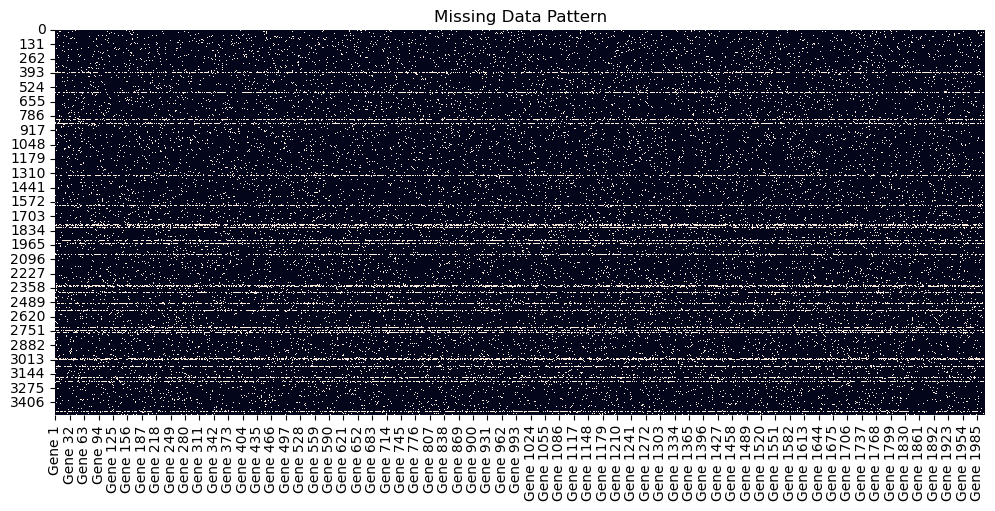


Class proportion

CLASS PROPORTIONS
Absolute counts:
Outcome
3    1280
2     881
1     730
0     629
Name: count, dtype: int64

Proportions (%):
Outcome
3    36.363636
2    25.028409
1    20.738636
0    17.869318
Name: proportion, dtype: float64

CORRELATION ANALYSIS

Number of highly correlated feature pairs (|r| > 0.9): 59
Top 5 most correlated feature pairs:
Gene 4 - Gene 1323 (r = 1.000)
Gene 8 - Gene 1822 (r = 1.000)
Gene 32 - Gene 888 (r = 1.000)
Gene 39 - Gene 84 (r = 1.000)
Gene 39 - Gene 848 (r = 1.000)

Min, Max, and Variance

VALUE RANGE AND VARIANCE
Maximum value in dataset: 51864.0
Minimum value in dataset: 0.0
Feature with highest variance: Gene 1127 (45090801.160)

Boxplot for top 30 most variable features


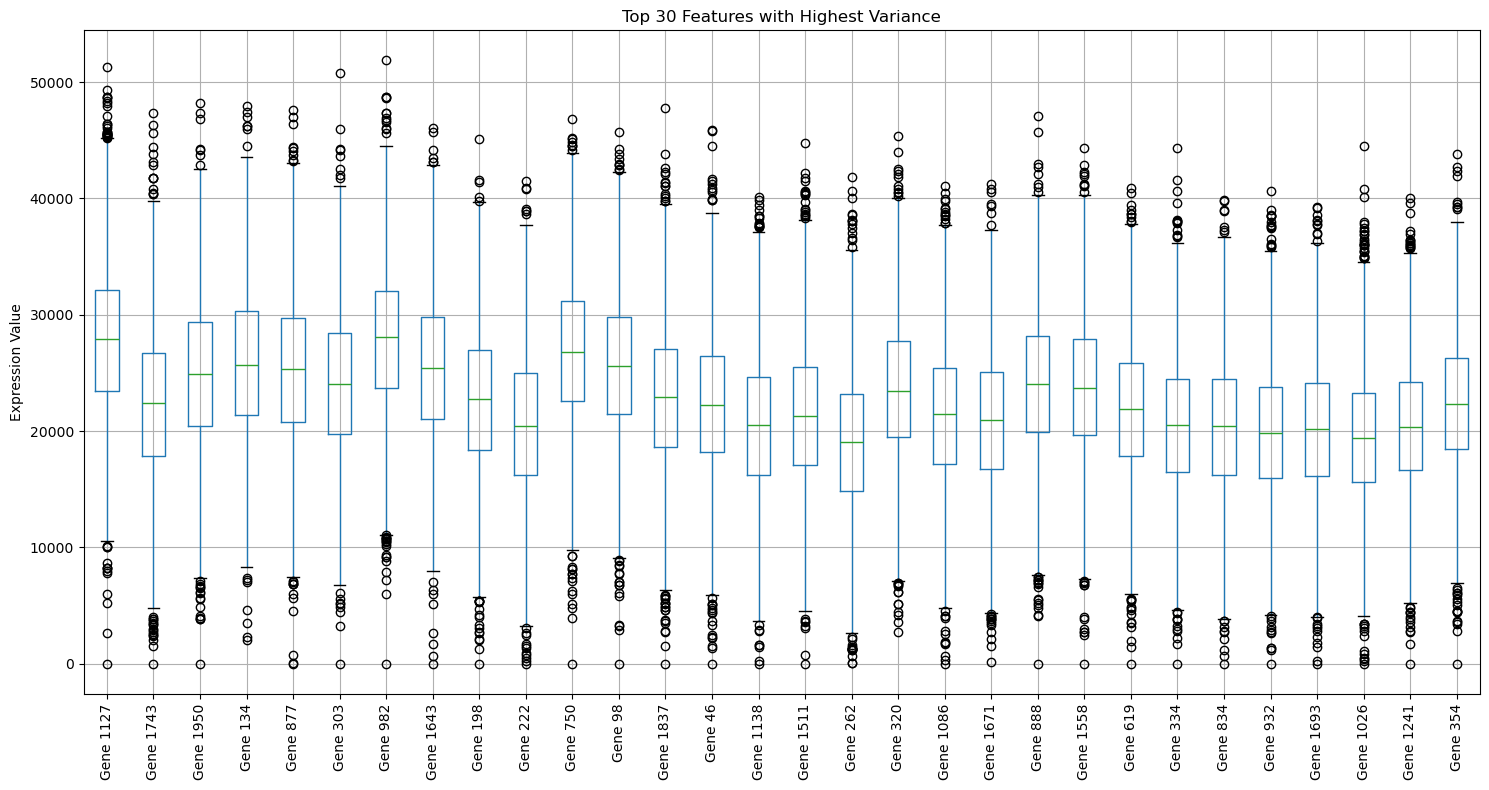


Exploraty Data Analysis SUMMARY
Dataset shape: (3520, 2002)
Total missing values: 497848
Highly correlated feature pairs (>0.9): 59
Value range: [0.0, 51864.0]
Feature with highest variance: Gene 1127


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data exploratory
print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Load in dataset
train_data = pd.read_csv('train_2025_2026.csv')
print(f"\nDataset shape: {train_data.shape[0]} rows, {train_data.shape[1]} columns")

# Preview the dataset
print("\nPreview of dataset:")
print(train_data.head())

# Missing values summary
print("\n" + "="*50)
print("MISSING DATA SUMMARY")
print("="*50)
missing_by_column = train_data.isnull().sum()
columns_with_missing = missing_by_column[missing_by_column > 0]
rows_with_any_missing = train_data.isnull().any(axis=1).sum()
rows_with_all_missing = train_data.isnull().all(axis=1).sum()
rows_with_half_missing = (train_data.isnull().sum(axis=1) > train_data.shape[1] // 2).sum()

print(f"Total missing values: {train_data.isnull().sum().sum()}")
print(f"Columns with missing values: {len(columns_with_missing)}")
print(f"Rows with any missing values: {rows_with_any_missing} ({rows_with_any_missing / len(train_data) * 100:.1f}%)")
print(f"Rows with all values missing: {rows_with_all_missing} ({rows_with_all_missing / len(train_data) * 100:.1f}%)")
print(f"Rows with >50% values missing: {rows_with_half_missing} ({rows_with_half_missing / len(train_data) * 100:.1f}%)")

missing_analysis = pd.DataFrame({
    'Missing_Count': train_data.isnull().sum(),
    'Missing_Percentage': (train_data.isnull().sum() / len(train_data)) * 100
}).sort_values('Missing_Count', ascending=False)
print("\nTop 10 columns with most missing values:")
print(missing_analysis.head(10))

# Optional: visualize missingness
plt.figure(figsize=(12, 5))
sns.heatmap(train_data.isnull(), cbar=False)
plt.title('Missing Data Pattern')
plt.show()

# # Row-level missing info
# rows_with_any_missing = train_data.isnull().any(axis=1).sum()
# rows_with_all_missing = train_data.isnull().all(axis=1).sum()
# rows_with_half_missing = (train_data.isnull().sum(axis=1) > train_data.shape[1]//2).sum()

# print(f"Rows with any missing values: {rows_with_any_missing} ({rows_with_any_missing/len(train_data)*100:.1f}%)")
# print(f"Rows with all values missing: {rows_with_all_missing} ({rows_with_all_missing/len(train_data)*100:.1f}%)")
# print(f"Rows with >50% values missing: {rows_with_half_missing} ({rows_with_half_missing/len(train_data)*100:.1f}%)")

# print("\nMissing value patterns (first 10 columns with most missing):")
# missing_analysis = pd.DataFrame({
#     'Missing_Count': train_data.isnull().sum(),
#     'Missing_Percentage': (train_data.isnull().sum() / len(train_data)) * 100
# }).sort_values('Missing_Count', ascending=False)
# print(missing_analysis.head(10))

# class proportion?? need to check
print("\n" + "="*50)
print("Class proportion")
print("="*50)
if 'Outcome' in train_data.columns:
    print("\n" + "="*50)
    print("CLASS PROPORTIONS")
    print("="*50)
    class_counts = train_data['Outcome'].value_counts()
    class_proportions = train_data['Outcome'].value_counts(normalize=True) * 100
    print("Absolute counts:")
    print(class_counts)
    print("\nProportions (%):")
    print(class_proportions)
else:
    print("\nNo 'Outcome' column found — skipping class proportion analysis.")


# Correlation analysis
print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)
numeric_data = train_data.drop(columns=['Outcome'], errors='ignore')
corr_matrix = numeric_data.corr().abs()

# Identify highly correlated feature pairs
high_corr_pairs = np.where(np.triu(corr_matrix, 1) > 0.9)
high_corr_features = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y])
                      for x, y in zip(*high_corr_pairs)]
print(f"\nNumber of highly correlated feature pairs (|r| > 0.9): {len(high_corr_features)}")
if len(high_corr_features) > 0:
    print("Top 5 most correlated feature pairs:")
    for pair in high_corr_features[:5]:
        print(f"{pair[0]} - {pair[1]} (r = {pair[2]:.3f})")

# Optional: correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Min, max, and variance
print("\n" + "="*50)
print("Min, Max, and Variance")
print("="*50)
max_value = numeric_data.max().max()
min_value = numeric_data.min().min()
print("\n" + "="*50)
print("VALUE RANGE AND VARIANCE")
print("="*50)
print(f"Maximum value in dataset: {max_value}")
print(f"Minimum value in dataset: {min_value}")

# Feature variance
feature_variances = numeric_data.var().sort_values(ascending=False)
highest_variance_feature = feature_variances.idxmax()
print(f"Feature with highest variance: {highest_variance_feature} ({feature_variances.iloc[0]:.3f})")

# Bloxplot 
print("\n" + "="*50)
print("Boxplot for top 30 most variable features")
print("="*50)
top30_features = feature_variances.head(30).index
plt.figure(figsize=(15, 8))
numeric_data[top30_features].boxplot(rot=90)
plt.title('Top 30 Features with Highest Variance')
plt.ylabel('Expression Value')
plt.tight_layout()
plt.show()

# Summary
print("\n" + "="*50)
print("Exploraty Data Analysis SUMMARY")
print("="*50)
print(f"Dataset shape: {train_data.shape}")
print(f"Total missing values: {train_data.isnull().sum().sum()}")
print(f"Highly correlated feature pairs (>0.9): {len(high_corr_features)}")
print(f"Value range: [{min_value}, {max_value}]")
print(f"Feature with highest variance: {highest_variance_feature}")



# # Class proportions
# print("\n" + "="*50)
# print("Proportion of classes in data")
# class_counts = train_data['Outcome'].value_counts()
# class_proportions = train_data['Outcome'].value_counts(normalize=True) * 100
# print("Absolute counts:")
# print(class_counts)
# print("\nProportions (%):")
# print(class_proportions)

# # Correlation matrix
# corr_matrix = train_data.corr()
# print(corr_matrix)

# print("\n" + "="*50)
# print("EXPLORATORY DATA ANALYSIS SUMMARY")
# print("="*50)
# print(f"Dataset: {train_data.shape[0]} rows, {train_data.shape[1]} columns")
# print(f"Total missing values: {train_data.isnull().sum().sum()}")


In [4]:
# Guided Exercise 2: Undersampling to balance classes
from sklearn.utils import resample
imbalanced_data = pd.read_csv('train_2025_2026.csv')

#check the count for every class
class_counts = imbalanced_data['Outcome'].value_counts()
print(class_counts)

#the class with the fewer counts
num_min = min(class_counts)
print('Number of samples of the class with fewer samples:', num_min)

# for each class we randomly select the number of samples of the class with less samples
balanced_list = []
for class_ in imbalanced_data['Outcome'].unique():
    df_class = imbalanced_data[imbalanced_data['Outcome'] == class_]
    df_resampled = resample(df_class, replace=False, n_samples=num_min, random_state=42)
    balanced_list.append(df_resampled)

# we create a dataframe with all the balanced clases and saved it in a csv
balanced_data = pd.concat(balanced_list)
print('New class distribution:\n', balanced_data['Outcome'].value_counts())
balanced_data.to_csv('training_balanced_data.csv', index=False)


Outcome
3    1280
2     881
1     730
0     629
Name: count, dtype: int64
Number of samples of the class with fewer samples: 629
New class distribution:
 Outcome
3    629
0    629
2    629
1    629
Name: count, dtype: int64


In [ ]:
# Guided exercise 3:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score
import pandas as pd

# load balanced data
data = pd.read_csv('training_balanced_data.csv')
X = data.drop(columns=['Outcome', 'Id'])
y = data['Outcome']

#split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#pipeline seting and training
model = make_pipeline(SimpleImputer(), StandardScaler(), LogisticRegression(max_iter=1000, penalty = None))
model.fit(X_train, y_train)

# predicting and probability with the model the training and testing
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)

# calculate ROC AUC and macro F1 metrics
roc_train = roc_auc_score(y_train, y_train_prob, multi_class='ovr')
roc_val = roc_auc_score(y_test, y_test_prob, multi_class='ovr')

f1_train = f1_score(y_train, y_train_pred, average='macro')
f1_val = f1_score(y_test, y_test_pred, average='macro')

print(f"Training ROC AUC: {roc_train:.4f}")
print(f"Validation ROC AUC: {roc_val:.4f}")
print(f"Training Macro F1: {f1_train:.4f}")
print(f"Validation Macro F1: {f1_val:.4f}")

'''
Explanation of the metrics:

ROC AUC one-versus-rest basically performs a normal ROC AUC for binary classification, which basically compares the performance
of the model regarding true positive rate and false positive rate over all posible thresholds. But in this case, as we are in a
multiclasification task, this AUC will be the average of comparing each class against all other classes togheter as if they 
formed a new class all toghether.

Macro F1 is like a plain F1 in binary classification, where precission and recall are taken into acount and the average is done in a one-versus-rest 
as with the ROC AUC.
'''
'''
The impute and scaling of the data can't be done before the spliting of the training and validation data because then we would be imputing and
scaling taking into acount the average of all data including the one that will be used for testing, which will actually give information to the model
of the validation data and thus the generalisation poerformance accuracy will be compromised.
'''


Training ROC AUC: 1.0000
Validation ROC AUC: 0.9408
Training Macro F1: 1.0000
Validation Macro F1: 0.7940


"\nThe impute and scaling of the data can't be done before the spliting of the training and validation data because then we would be imputing and\nscaling taking into acount the average of all data including the one that will be used for testing, which will actually give information to the model\nof the validation data and thus the generalisation poerformance accuracy will be compromised.\n"

In [ ]:
# Guided exercise 4:
from sklearn.impute import KNNImputer

# make pipeline
model = make_pipeline(StandardScaler(), KNNImputer(n_neighbors=3), LogisticRegression(penalty=None))

# train moldel
model.fit(X_train, y_train)

# predicting and probability with the model the training and testing
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)

# calculate ROC AUC and macro F1 metrics
roc_train = roc_auc_score(y_train, y_train_prob, multi_class='ovr')
roc_val = roc_auc_score(y_test, y_test_prob, multi_class='ovr')

f1_train = f1_score(y_train, y_train_pred, average='macro')
f1_val = f1_score(y_test, y_test_pred, average='macro')

print(f"Training ROC AUC: {roc_train:.4f}")
print(f"Validation ROC AUC: {roc_val:.4f}")
print(f"Training Macro F1: {f1_train:.4f}")
print(f"Validation Macro F1: {f1_val:.4f}")


'''
In this case, we first need to scale the data as the imputer algorithm uses euclidian distances to find the nearest neighbor in the data space,
taking into acount all the dimensions, and so it's necessary to scale the data so not one feature has more weight than another when 
computing which is the nearest neighbour.
'''

Training ROC AUC: 1.0000
Validation ROC AUC: 0.9478
Training Macro F1: 1.0000
Validation Macro F1: 0.8139


"\nIn this case, we first need to scale the data as the imputer algorithm uses euclidian distances to find the nearest neighbor in the data space,\ntaking into acount all the dimensions, and so it's necessary to scale the data so not one feature has more weight than another when \ncomputing which is the nearest neighbour.\n"

In [7]:
# Guided exercise 5:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer

# Load the data
data = pd.read_csv('training_balanced_data.csv')
X = data.drop(columns=['Outcome', 'Id'])
y = data['Outcome']

# Create both pipelines
modelreg = make_pipeline(StandardScaler(), KNNImputer(n_neighbors=3), LogisticRegression(C = 1))
modelnoreg = make_pipeline(StandardScaler(), KNNImputer(n_neighbors=3), LogisticRegression(penalty=None))

# Scoring metrics dictionary
scoring = {
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', response_method='predict_proba'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

#cross validation and trainings
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_resultsreg = cross_validate(modelreg, X, y, cv=cv, scoring=scoring)
cv_resultsnoreg = cross_validate(modelnoreg, X, y, cv=cv, scoring=scoring)

# metric calculations
roc_aucreg = np.mean(cv_resultsreg['test_roc_auc_ovr'])
f1_macroreg = np.mean(cv_resultsreg['test_f1_macro'])
roc_aucnoreg = np.mean(cv_resultsnoreg['test_roc_auc_ovr'])
f1_macronoreg = np.mean(cv_resultsnoreg['test_f1_macro'])


print(f"Average 10-fold ROC AUC (OvR) regularized model: {roc_aucreg:.4f}")
print(f"Average 10-fold F1 macro regularized model: {f1_macroreg:.4f}")
print(f"Average 10-fold ROC AUC (OvR) non regularized model: {roc_aucnoreg:.4f}")
print(f"Average 10-fold F1 macro non regularized model: {f1_macronoreg:.4f}")
print(f'ROC AUC difference Reg vs NonReg:{roc_aucreg-roc_aucnoreg:.4f}')
print(f'ROC AUC difference Reg vs NonReg:{f1_macroreg-f1_macronoreg:.4f}')


Average 10-fold ROC AUC (OvR) regularized model: 0.9427
Average 10-fold F1 macro regularized model: 0.7856
Average 10-fold ROC AUC (OvR) non regularized model: 0.9406
Average 10-fold F1 macro non regularized model: 0.7818
ROC AUC difference Reg vs NonReg:0.0021
ROC AUC difference Reg vs NonReg:0.0038


The variance explained by the PC1 and PC2 in %: [0.67 0.63]
Top features for PC: 
 PC1      Gene 113
PC2     Gene 1478
PC3     Gene 1882
PC4     Gene 1049
PC5      Gene 639
PC6      Gene 385
PC7      Gene 120
PC8     Gene 1924
PC9     Gene 1268
PC10     Gene 213
dtype: object


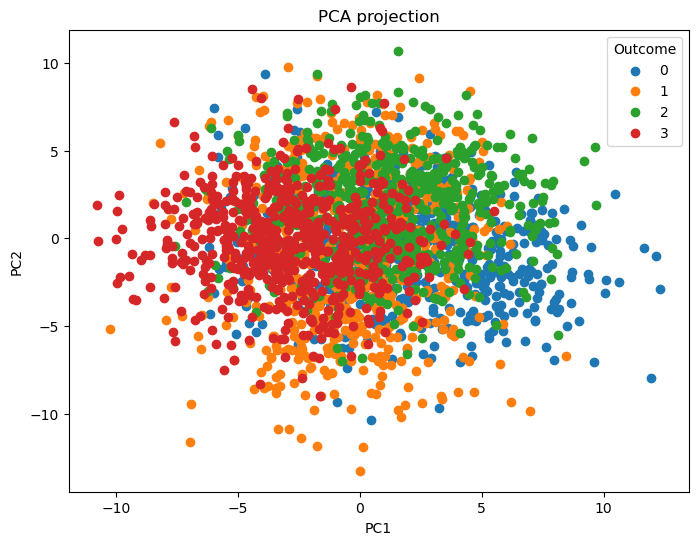

In [8]:
# Guided exercise 6:
from sklearn.decomposition import PCA

# Load the data
data = pd.read_csv('training_balanced_data.csv')
X = data.drop(columns=['Outcome', 'Id'])
y = data['Outcome']

#names of each feture
feature_names = X.columns.tolist()

#sacle and impute
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X_scaled)

#pca transformation
pca = PCA()
X_pca = pca.fit_transform(X_imputed)

#explained variance
explain_2PC = pca.explained_variance_ratio_[:2]
print(f'The variance explained by the PC1 and PC2 in %: {(100* explain_2PC).round(2)}')

#dataframe with top features per PC:
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=feature_names)

#just top feature per PC
top_features = loadings.abs().idxmax()

print(f'Top features for PC: \n {top_features[:10]}')

#Plot
plt.figure(figsize=(8,6))
for label in np.unique(y):
    plt.scatter(X_pca[y==label, 0], X_pca[y==label, 1], label=str(label))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA projection')
plt.legend(title = 'Outcome')  
plt.show()


In [ ]:
#Guided exercise 7:

#Load data
data = pd.read_csv('training_balanced_data.csv')
X = data.drop(columns=['Outcome', 'Id'])
y = data['Outcome']

#set pipeline
model = make_pipeline(StandardScaler(), KNNImputer(n_neighbors=3), PCA(n_components=100), LogisticRegression(C = 1))

# scoring metrics
scoring = {
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', response_method='predict_proba'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# cross validation and training
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring)

#metrics
roc_auc = np.mean(cv_results['test_roc_auc_ovr'])
f1_macro = np.mean(cv_results['test_f1_macro'])


print(f"Average 10-fold ROC AUC (OvR) PCA regularized model: {roc_auc:.4f}")
print(f"Average 10-fold F1 macro PCA regularized model: {f1_macro:.4f}")
print(f'ROC AUC improvement PCA vs NonPCA:{((roc_auc-0.9427)/0.9427*100):.4f}%')
print(f'ROC AUC improvement PCA vs NonPCA:{((f1_macro-0.7856)/0.7856*100):.4f}%')

Average 10-fold ROC AUC (OvR) PCA regularized model: 0.9493
Average 10-fold F1 macro PCA regularized model: 0.8014
ROC AUC improvement PCA vs NonPCA:0.6962%
ROC AUC improvement PCA vs NonPCA:2.0065%


In [3]:
# guided exercise 8:
from sklearn.model_selection import RandomizedSearchCV

data = pd.read_csv('training_balanced_data.csv')
X = data.drop(columns=['Outcome', 'Id'])
y = data['Outcome']

model = make_pipeline(StandardScaler(), KNNImputer(n_neighbors=3), PCA(), LogisticRegression())


scoring = {
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', response_method='predict_proba'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

param_distributions = {
    'pca__n_components': [50, 100, 200, 500],
    'logisticregression__C': [0.01, 0.1, 1, 10, 100]
}

inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    cv=inner_cv,
    random_state=42,
    n_jobs=-2
)

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
nested_scores = cross_validate(
    random_search, X, y, cv=outer_cv, scoring=scoring, n_jobs=-2
)

# metric calculations
roc_aucreg = np.mean(nested_scores['test_roc_auc_ovr'])
f1_macroreg = np.mean(nested_scores['test_f1_macro'])

print('Metrics for best hyperparameters:')
print(f"Average 5-fold ROC AUC (OvR): {roc_aucreg:.4f}")
print(f"Average 5-fold F1 macro: {f1_macroreg:.4f}")


Metrics for best hyperparameters:
Average 5-fold ROC AUC (OvR): 0.9530
Average 5-fold F1 macro: 0.8106


In [ ]:
# Guided exercise 10:
from keras import layers, Input
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier


#load data
data = pd.read_csv('training_balanced_data.csv')
X = data.drop(columns=['Outcome', 'Id'])
y = data['Outcome']
y = y.astype(int)
input_shape = X.shape[1]
class_num = y.nunique()

# we had to create our own function as we were having an errror of KerasClassifier thinking 
# the pipeline was a regressor (not a classifier) and not accepting the prediction of probabilities for roc_auc.
def roc_auc_ovr_scorer(estimator, X, y):
    # predict probabilities from pipeline
    y_proba = estimator.predict_proba(X)
    return roc_auc_score(y, y_proba, multi_class='ovr')


# build keras NN model
def build_model(hiddenLayerOne=30, hiddenLayerTwo=20, hiddenLayerThree=10):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(hiddenLayerOne, activation='relu'), 
        Dense(hiddenLayerTwo, activation='relu'),
        Dense(hiddenLayerThree, activation='relu'),
        Dense(4, activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# pass the keras NN to a scikit learn classifier object
clf = KerasClassifier(
    model=build_model,
    epochs=10,
    batch_size=32,
    verbose=0 
)

pipeNN = make_pipeline(SimpleImputer(strategy="constant", fill_value=-1), StandardScaler(), clf)

# scoring metrics
scoring = {
    'roc_auc_ovr': roc_auc_ovr_scorer,
    'f1_macro': make_scorer(f1_score, average='macro')
}

# cross validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_validate(pipeNN, X, y, cv=cv, scoring=scoring)

roc_auc = np.mean(cv_results['test_roc_auc_ovr'])
f1_macro = np.mean(cv_results['test_f1_macro'])


print(f"Average 10-fold ROC AUC (OvR) NN: {roc_auc:.4f}")
print(f"Average 10-fold F1 macro NN: {f1_macro:.4f}")



Average 10-fold ROC AUC (OvR) NN: 0.9251
Average 10-fold F1 macro NN: 0.7456
